# Geoid Anomaly Grid
**Description:**  Gridded geoid heights from EIGEN-6C4 originally at a 10 arc-min resolution. Can be added to a ellipsoid-referenced elevation grid to convert it to be referenced to the geoid. 

**Dataset DOI:** Pre-processed as part of the Fatiando Data repository: 10.5281/zenodo.5882205 

**Associated paper:** EIGEN-6C4 The Latest Combined Global Gravity Field Model Including GOCE Data up to Degree and Order 2190 of GFZ Potsdam and GRGS Toulouse. DOI: 10.5880/ICGEM.2015.1

In [2]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, utils

In [3]:
data = fetch.geoid(
    # available options
    # region,
    # spacing,
    # registration ("g" for gridline or "p" for pixel),
)
data

<xarray.DataArray 'z' (y: 1333, x: 1333)> Size: 7MB
array([[-16.599499  , -16.616226  , -16.633516  , ..., -19.13951   ,
        -19.175117  , -19.200743  ],
       [-16.617685  , -16.63369   , -16.65044   , ..., -19.169407  ,
        -19.203981  , -19.230883  ],
       [-16.637125  , -16.651854  , -16.66783   , ..., -19.206947  ,
        -19.239204  , -19.264574  ],
       ...,
       [ -0.8101927 ,  -0.7247276 ,  -0.63461506, ...,  44.46801   ,
         44.50784   ,  44.56569   ],
       [ -0.86616945,  -0.76891154,  -0.6587081 , ...,  44.393402  ,
         44.423275  ,  44.47258   ],
       [ -0.90295964,  -0.789073  ,  -0.66556513, ...,  44.33951   ,
         44.362556  ,  44.401966  ]], dtype=float32)
Coordinates:
  * x        (x) float64 11kB -3.33e+06 -3.325e+06 ... 3.325e+06 3.33e+06
  * y        (y) float64 11kB -3.33e+06 -3.325e+06 ... 3.325e+06 3.33e+06
Attributes:
    long_name:     z
    actual_range:  [-66.12410736  52.22007751]

In [4]:
_ = utils.get_grid_info(data, print_info=True)

grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: -66.1241073608
grid zmax: 52.2200775146
grid registration: g


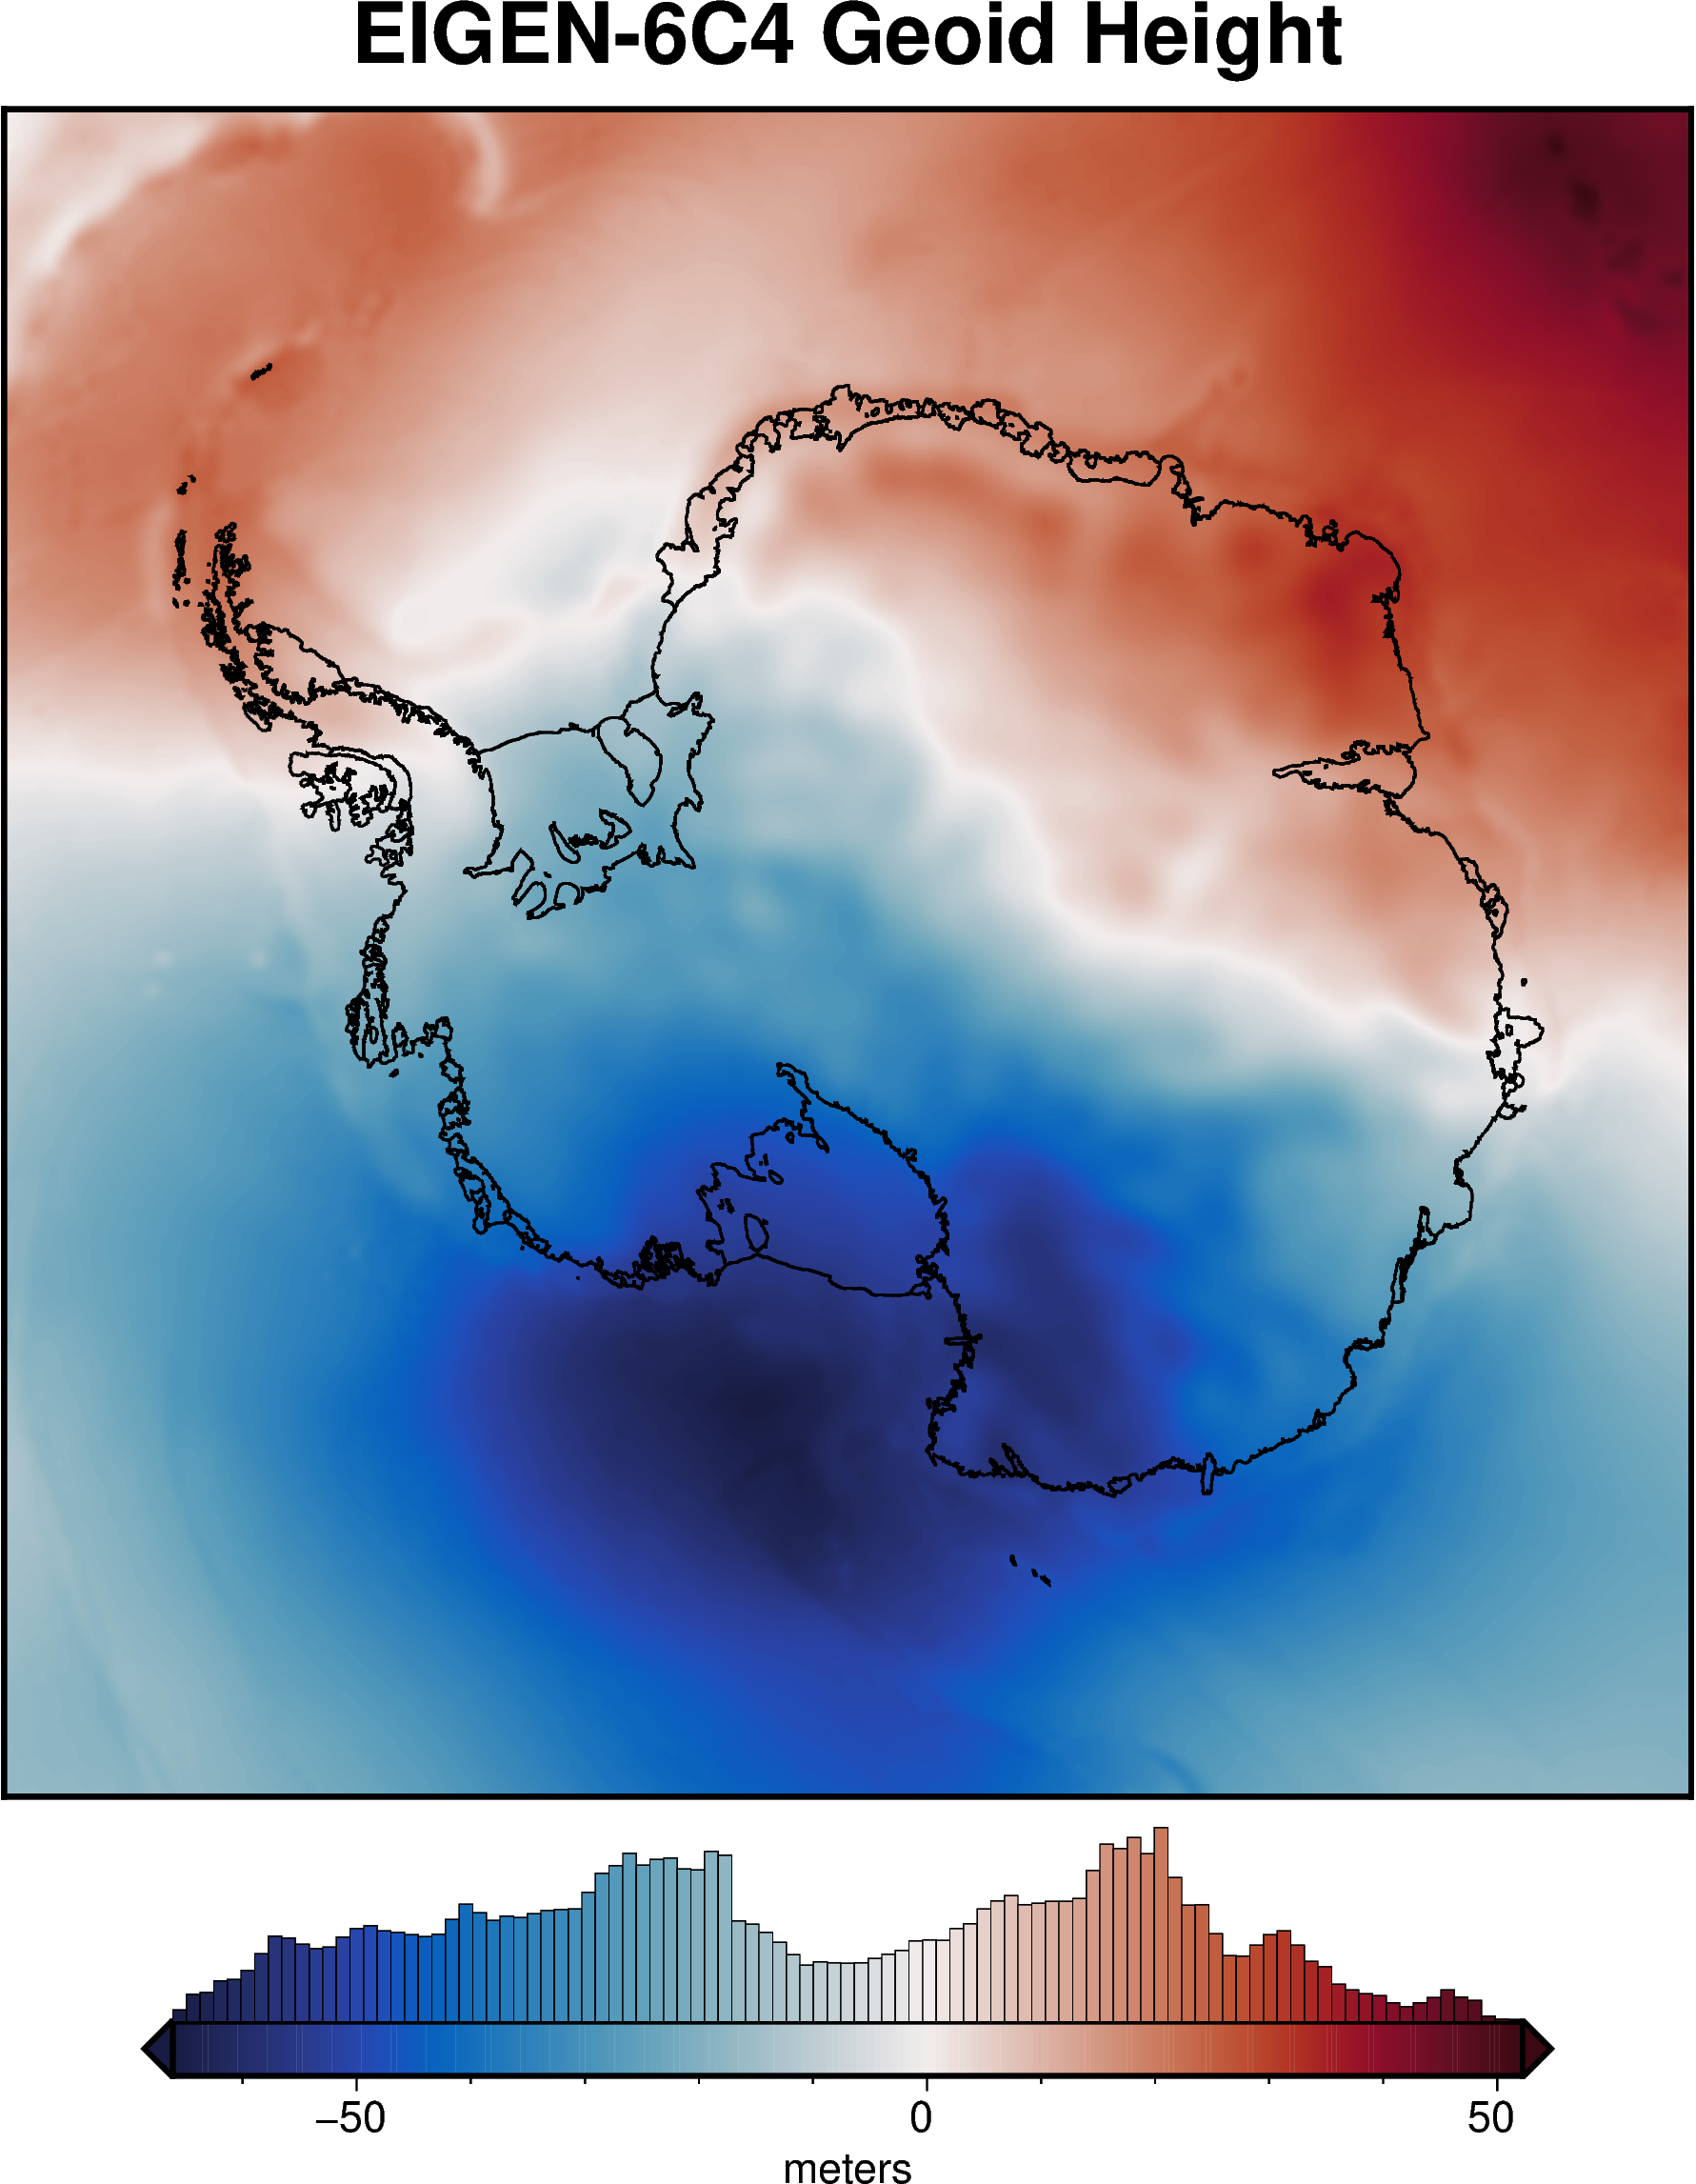

In [5]:
fig = maps.plot_grd(
    data,
    title="EIGEN-6C4 Geoid Height",
    cmap="balance+h0",
    coast=True,
    cbar_label="meters",
    hist=True,
)

fig.show()